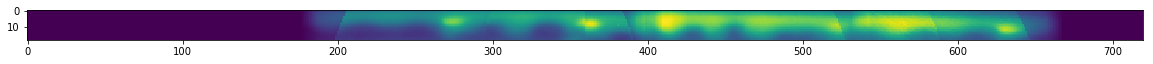

In [98]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
data = np.flip(fits.open("fits/2017may_2.12_neb.fits")[0].data, 0)
plt.figure(figsize=(20, 1))
plt.imshow(data)
plt.show()

In [69]:
from copy import deepcopy

def rollingMedian(data, numWindows=10):
    rollingMed = deepcopy(data)
    windowSize = int(len(data)/numWindows)
    for i in range(0, len(data), windowSize):
        if i+windowSize > len(data):
            rollingMed[i:] = np.full(len(data)-i, np.median(data[i:]))
        else:
            rollingMed[i:i+windowSize] = np.full(windowSize, np.median(data[i:i+windowSize]))
    return rollingMed

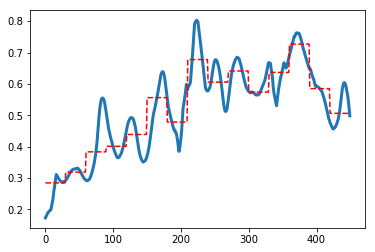

In [96]:
avg = np.mean(data, 0)[190:640]
lon = np.arange(len(avg))
plt.plot(lon, avg, linewidth=3)
plt.plot(lon, rollingMedian(avg, numWindows=15), color='red', linestyle='--')
plt.show()

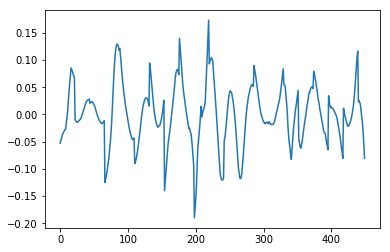

In [95]:
data_detrended = avg-rollingMedian(avg, numWindows=20)
plt.plot(lon, data_detrended)
plt.show()

In [ ]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(x, y).autopower()
plt.plot(frequency, power)
plt.show()